In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math

## Gradient descent on a quadratic function

Let $n$, $m$ be two integers. Let $A\in\mathbb{R}^{m\times n}$ be a matrix. We define
\begin{equation*}
f_A : x\in\mathbb{R}^n \to \frac{1}{2} ||Ax||^2.
\end{equation*}

**Question 1 :** Show that $f_A$ is convex and strongly convex if $A$ is injective. What is the strong convexity constant?

The function $f_A$ can be rewritten as
\begin{equation*}
f_A:x \to \frac{1}{2} \langle Ax,Ax\rangle = \frac{1}{2} \langle A^TAx,x\rangle.
\end{equation*}
The matrix $A^TA$ is symmetric, and positive semidefinite (since, for any $y$, $\langle A^TAy, y\rangle =||Ay||^2 \geq 0)$. Therefore, $f_A$ is convex.

If $A$ is injective, then $\langle A^TAy,y\rangle = ||Ay||^2 >0$ for any non-zero vector $y$. In this case, the matrix $A^TA$ is positive definite. As seen during the lectures, $f_A$ is then strongly convex and the strong convexity constant is the smallest eigenvalue of $A^TA$, which we denote $\lambda_{\min}(A^TA)$.

**Question 2 :** What is the minimum of $f_A$? Compute the gradient of $f_A$ and show that it is Lipschitz. What is its Lipschitz constant?

For any $x\in\mathbb{R}^n$, $f_A(x)\geq 0$. In addition, $f_A(0)=0$. The minimum of $f_A$ is zero.

From the lectures, the gradient of $f_A$ at a point $x$ is $\nabla f_A(x) = A^TAx$. It is Lipschitz with constant $\lambda_{\max}(A^TA)$.

**Question 3 :** Write a function descent_fA_constant_step($A$,$x_0$,$T$,$\alpha$) which applies $T$ steps of gradient descent to $f_A$, starting at point $x_0$, with constant stepsize $\alpha$. The function must return the sequence of iterates $(x_t)_{t=0,\dots,T}$ and the sequence of objective values $(f(x_t))_{t=0,\dots,T}$.

In [2]:
def descent_fA_constant_step(A,x0,T,alpha):
    
    n = np.shape(x0)[0]
    iterates = np.zeros((n,T+1))
    vals = np.zeros(T+1)

    iterates[:,0:1] = x0
    vals[0] = 0.5 * np.linalg.norm(A.dot(x0))**2
    
    for t in range(1,T+1):
        grad = A.transpose().dot(A.dot(iterates[:,t-1:t]))
        x = iterates[:,t-1:t] - alpha * grad
        iterates[:,t:t+1] = x
        vals[t] = 0.5 * np.linalg.norm(A.dot(x))**2
        
    return (iterates,vals)

To check the code and get a first idea of the behavior of gradient descent, we run it with $n=m=2$. The function below plots the level sets of $f_A$ and a sequence of iterates.

In [3]:
def plot_iterates_2D(A,iterates):
    
    # Compute the display range
    M = np.linalg.norm(iterates[:,0])
    axis_x = np.linspace(-M*4/3,M*4/3,101)
    axis_y = np.linspace(-M,M,101)
    [xs,ys] = np.meshgrid(axis_x,axis_y,indexing='xy')
    # Compute the values of fA
    xs_ys_concat = np.stack([xs, ys],axis=2)
    vals_fA = 0.5 * np.linalg.norm(np.dot(xs_ys_concat, A.transpose()),axis=2) ** 2
    # Plot
    plt.contour(axis_x,axis_y,vals_fA,20);
    plt.plot(iterates[0,:], iterates[1,:], 'kx-');
    plt.axis('equal')

**Question 4 :** Run gradient descent on $f_A$ for $A=\left(\begin{smallmatrix}1&0\\0&2\end{smallmatrix}\right)$, with stepsize $0.2$, for a random starting point. Comment the behavior of the iterates.

We can check that, for any $t\in\mathbb{N}$, $x_t = (0.8^t x_{0,1}, 0.2^t x_{0,2})$, where $x_0=(x_{0,1},x_{0,2})$ is the starting point. Hence the vertical coordinate decreases much faster than the horizontal one, and the iterates tend to align with the horizontal axis.

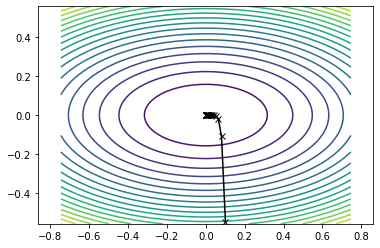

In [4]:
A = np.array([[1,0], [0,2.]])
x0 = random.randn(2,1)
(iterates,vals) = descent_fA_constant_step(A,x0,20,0.2)

plot_iterates_2D(A,iterates)

We now test the algorithm in higher dimension. The following function takes as input $m,n$, a number of iterations, a set of starting points and a gradient descent algorithm. It picks a random matrix $A$ (with coefficients independently chosen according to a normal distribution), runs gradient descent for each given starting point, and plots $(f(x_t))_{t\geq 0}$.

Since we will need this information, the function also returns the smoothness and strong convexity constants.

In [5]:
def run_descent(m,n,nb_its,x0s,algo):
    # Choose random A
    A = np.random.randn(m,n)
    (eig_vals,eig_vecs) = np.linalg.eig(A.transpose().dot(A))
    # Compute condition number
    L = max(eig_vals)
    mu = min(eig_vals)
    print("Condition number : ",L/mu)

    # Run gradient descent
    plt.yscale("log")
    for its_x0 in range(0,np.shape(x0s)[1]):
        x0 = x0s[:,its_x0:its_x0+1]
        (iterates,vals) = algo(A,x0,nb_its,1/L)
        plt.plot(vals)
        
    return (L,mu)

**Question 5 :** Run this function for $m=20,n=8$, $40$ iterations and $20$ different initial points with norm $1$ (chosen at random). Add to the plot the convergence rate proved during the lecture for gradient descent when applied to general smooth strongly convex functions.

Condition number :  10.373369008047755


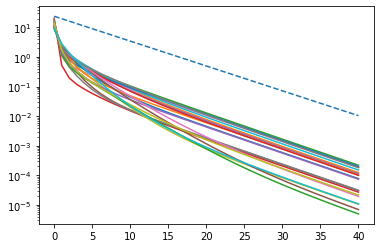

In [6]:
n = 8
m = 20
nb_its = 40
nb_runs = 20

x0s = np.random.randn(n,nb_runs)
x0_norms = np.linalg.norm(x0s,axis=0)
x0s = x0s/x0_norms

(L,mu) = run_descent(m,n,nb_its,x0s,descent_fA_constant_step)

its = np.arange(0,nb_its+1)
theory_strongly_cvx = L/2 * ((L-mu)/(L+mu))**its
plt.plot(theory_strongly_cvx,'--')

**Question 6 :** Same question for $n=m=10$. Display also the convergence rate proved during the lecture for general smooth convex functions.

Condition number :  5515.880989059012


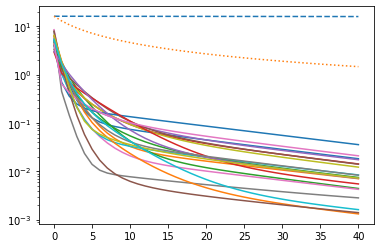

In [7]:
n = 10
m = 10
nb_its = 40
nb_runs = 20

x0s = np.random.randn(n,nb_runs)
x0_norms = np.linalg.norm(x0s,axis=0)
x0s = x0s/x0_norms

(L,mu) = run_descent(m,n,nb_its,x0s,descent_fA_constant_step)

its = np.arange(0,nb_its+1)
theory_strongly_cvx = L/2 * ((L-mu)/(L+mu))**its
theory_cvx = 2 * L / (its+4)
plt.plot(theory_strongly_cvx,'--')
plt.plot(theory_cvx,':')

**Question 7 :** Implement gradient descent with backtracking line search instead of constant stepsize, with a function named descent_fA_backtrack. For the backtracking line search, use the following parameters :

$\bullet$ At iteration $t\geq 1$, choose $1.1 \alpha_{t-1}$ as a starting point for the stepsize search ($\alpha_{t-1}$ is the stepsize chosen at iteration $t-1$). Choose $1$ when $t=0$.

$\bullet$ Use as stopping criterion $f_A(x_{t-1}-\alpha_t \nabla f_A(x_{t-1})) - f_A(x_{t-1}) \leq -\frac{1}{2} \alpha_t ||\nabla f_A(x_{t-1})||^2$.

$\bullet$ Each time the stopping criterion is not met, devide the stepsize by $2$.

In [8]:
def descent_fA_backtrack(A,x0,T):
    
    n = np.shape(x0)[0]
    iterates = np.zeros((n,T+1))
    vals = np.zeros(T+1)

    iterates[:,0:1] = x0
    vals[0] = 0.5 * np.linalg.norm(A.dot(x0))**2
    
    alpha = 1
    
    for t in range(1,T+1):
        grad = A.transpose().dot(A.dot(iterates[:,t-1:t]))
        xprev = iterates[:,t-1:t]
        x = xprev - alpha * grad
        # Backtracking line search
        while (0.5*np.linalg.norm(A.dot(x))**2
               - 0.5*np.linalg.norm(A.dot(xprev))**2
               > - 0.5 * alpha * np.linalg.norm(grad)**2):
            alpha = alpha / 2
            x = xprev - alpha * grad        
        iterates[:,t:t+1] = x
        vals[t] = 0.5 * np.linalg.norm(A.dot(x))**2
        alpha = alpha * 1.1
        
    return (iterates,vals)

We compare gradient descent with constant $1/L$ stepsize and with backtracking line search by running the two algorithms with the same starting point, for a random $20\times 8$ matrix $A$.

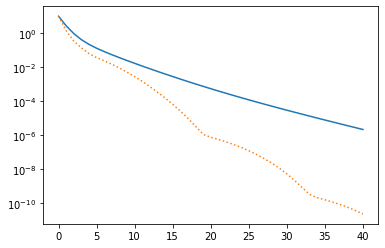

In [9]:
n = 8
m = 20
nb_its = 40

A = np.random.randn(m,n)
(eig_vals,eig_vecs) = np.linalg.eig(A.transpose().dot(A))
L = max(eig_vals)

x0 = np.random.randn(n,1)
x0 = x0/np.linalg.norm(x0)

plt.yscale("log")
(iterates_ctt,vals_ctt) = descent_fA_constant_step(A,x0,nb_its,1/L)
plt.plot(vals_ctt)
(iterates_bac,vals_bac) = descent_fA_backtrack(A,x0,nb_its)
plt.plot(vals_bac,':')

## Lasso

In the second part of this notebook, we empirically investigate what happens when we try to apply gradient descent to a non-differentiable convex function. We consider the lasso problem, where one wants to reconstruct a vector $x_{true}\in\mathbb{R}^n$ from noisy measurements
\begin{equation*}
y = Ax_{true} + w.
\end{equation*}
In the previous equation, $A\in\mathbb{R}^{m\times n}$ is a known matrix and $w\in\mathbb{R}^m$ is the noise vector.

We consider the setting where $m<n$, so $Ax_{true}$ does not uniquely determine $x_{true}$, but we have the a priori information that $x_{true}$ is sparse (that is, it has few non-zero coordinates).

It seems reasonable to try reconstructing $x_{true}$ by minimizing the following function, for some $\lambda>0$,
\begin{equation*}
f_{obj} : x\in\mathbb{R}^n \quad\to\quad
\frac{\lambda}{2} ||Ax-y||^2 + \mathrm{Card}\{k, x_k\ne 0\}.
\end{equation*}
As the function $x\to \mathrm{Card}\{k, x_k\ne 0\}$ is non-convex, and even non-continuous, this optimization is extremely difficult to solve. Instead of $f_{obj}$, we will therefore minimize a convex approximation,
\begin{equation*}
F_{obj} : x\in\mathbb{R}^n \quad\to\quad
\frac{\lambda}{2} ||Ax-y||^2 + ||x||_1,
\end{equation*}
where $||x||_1 = \sum_{k=1}^n |x_k|$.

**Question 8 :** Show that $F_{obj}$ is convex. Compute its subgradient. Is $F_{obj}$ differentiable?

Let us define $F_{obj,1} : x \to \frac{\lambda}{2}||Ax-y||^2$ and $F_{obj,2} : x \to ||x||_1$. These two functions are convex. Their sum, $F_{obj}$, is thus also convex.

From the second lecture by Vincent Duval, since $F_{obj,1}$ and $F_{obj,2}$ only take finite values, the subgradient of their sum is the sum of their subgradient: for any $z\in\mathbb{R}^n$,
\begin{align*}
\partial F_{obj}(z)
 = \partial\left(x\to \frac{\lambda}{2}||Ax-y||^2\right)(z)
+& \partial ||.||_1(z) \\
 = \lambda A^T(Az-y) + \{h\in\mathbb{R}^n\mbox{ s.t. }
& h_k=1\mbox{ if }z_k>0, \\
&h_k=-1\mbox{ if }z_k<0, \\
&h_k\in[-1;1] \mbox{ if }z_k=0\}.
\end{align*}
The function $F_{obj}$ is non-differentiable at each point where $\partial F_{obj}(z)$ is not a singleton, that is at each point $z$ such that $z_k=0$ for at least one index $k$.

**Question 9 :** Write a function descent_lasso, which takes as input $A,y,\lambda$, a maximal number of iterations $T$, an initial point $x_0$ and a list of stepsizes $\alpha\in\mathbb{R}^T$, applies subgradient descent to $F_{obj}$ with these parameters (that is, the same algorithm as gradient descent, with a subgradient instead of a gradient), and returns the sequences of iterates and objective values.

**Remark :** Subgradient descent is not a good algorithm to minimize $F_{obj}$; we only use this example to understand some properties of subgradient descent.

In [10]:
def descent_lasso(A,y,lam,T,x0,alpha):

    n = np.shape(x0)[0]
    iterates = np.zeros((n,T+1))
    vals = np.zeros(T+1)

    iterates[:,0:1] = x0
    vals[0] = lam/2 * np.linalg.norm(A.dot(x0)-y)**2 + \
        np.linalg.norm(x0,ord=1)
    
    for t in range(1,T+1):
        subgrad = lam*A.transpose().dot(A.dot(iterates[:,t-1:t])-y) + \
            np.sign(iterates[:,t-1:t])
        x = iterates[:,t-1:t] - alpha[t-1] * subgrad
        iterates[:,t:t+1] = x
        vals[t] = 0*lam/2 * np.linalg.norm(A.dot(x)-y)**2 + \
            np.linalg.norm(x,ord=1)
        
    return (iterates,vals)

The following function takes as input dimensions $m,n$, an integer $s$ which represents the number of non-zero coordinates of the underlying signal $x_{true}$, a number of iterations $T$ and a liste of stepsizes $\alpha\in\mathbb{R}^T$, constructs a test lasso instance and runs descent_lasso on it.

**Remark :** The function multiplies the stepsizes by a scaling factor $\frac{1}{\lambda \lambda_{\max}(A^TA)}$.

In [11]:
def test_descent_lasso(m,n,s,T,alpha):
    # Generate s-sparse n-dimensional signal
    x_true = np.zeros((n,1))
    x_true[0:s] = np.random.randn(s,1)
    # Measurements
    A = np.random.randn(m,n)
    eps = 0.1 * math.sqrt(s)
    y = A.dot(x_true) + eps * np.random.randn(m,1)
    # Adequate constant lambda
    lam = 1 / math.sqrt(m) / eps
    
    # Largest eigenvalue of A*A (to scale the stepsizes)
    (eig_vals,eig_vecs) = np.linalg.eig(A.transpose().dot(A))
    L = np.real(max(eig_vals))

    # Reasonable starting point
    x0 = np.linalg.pinv(A).dot(y)

    # Subgradient descent
    (iterates,vals) = descent_lasso(A,y,lam,T,x0,alpha/(lam*L))
    
    return vals

**Question 10 :** Run tests with $m=15,n=40,s=5$, $500$ iterations and constant stepsizes. Each time, display the evolution of the objective accross the iterations. What do you observe? Can you explain it?

The objective value decays rapidly in the first iterations, but then starts oscillating and does not seem to converge. An intuitive explanation of this non-convergence is that, if some coordinates of the minimizer $x_{\min}$ are zero, not all subgradients of $F_{obj}$ in a neighborhood of $x_{\min}$ are close to zero. Hence, the distance between two successive iterates does not decay to zero and the iterations cannot converge to $x_{\min}$; they tend to wander in a neighborhood of this point.

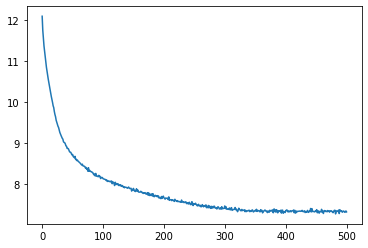

In [12]:
vals = test_descent_lasso(15,40,5,500,np.ones(500))
plt.plot(vals)

**Question 11 :** Perform tests with stepsizes decaying as $O(1/\sqrt{t})$. (Use more iterations than in the previous question.)

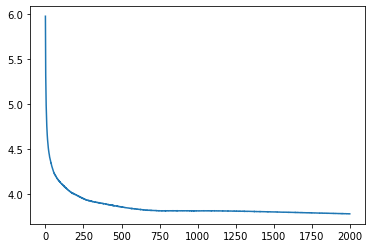

In [13]:
vals = test_descent_lasso(15,40,5,2000,1/np.sqrt(np.arange(1,2001)))
plt.plot(vals)